In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{max-width:100%!important;width:auto!important;}</style>"))

In [2]:
%reload_ext autoreload
%autoreload 2

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import xarray as xr
import datetime

%matplotlib inline
sns.set()

In [79]:
dat = pd.read_excel("C:/Users/johns/Downloads/owid-covid-data.xlsx", parse_dates=['date'], index_col = 'date')
dat.info()

C:\Users\johns\anaconda3-python\envs\bul7cv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86896 entries, 2020-02-24 to 2021-05-08
Data columns (total 58 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               86896 non-null  object 
 1   continent                              82713 non-null  object 
 2   location                               86896 non-null  object 
 3   total_cases                            84664 non-null  float64
 4   new_cases                              84662 non-null  float64
 5   new_cases_smoothed                     83661 non-null  float64
 6   total_deaths                           74936 non-null  float64
 7   new_deaths                             75094 non-null  float64
 8   new_deaths_smoothed                    83661 non-null  float64
 9   total_cases_per_million                84207 non-null  float64
 10  new_cases_per_million                  84205 non-null

In [233]:
dat2 = dat[~(dat['location'].isin(['World', 'Europe', 'North America', 'European Union','South America', 'Asia', 'Africa']))]
dat2

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,1.0,1.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2020-02-25,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2020-02-26,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2020-02-27,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2020-02-28,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-04,ZWE,Africa,Zimbabwe,38327.0,34.0,23.286,1574.0,1.0,1.286,2578.698,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
2021-05-05,ZWE,Africa,Zimbabwe,38357.0,30.0,23.714,1574.0,0.0,1.286,2580.716,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
2021-05-06,ZWE,Africa,Zimbabwe,38398.0,41.0,23.286,1575.0,1.0,1.143,2583.475,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [234]:
dat2.isna().sum()

iso_code                                     0
continent                                  927
location                                     0
total_cases                               2228
new_cases                                 2234
new_cases_smoothed                        3193
total_deaths                             11837
new_deaths                               11802
new_deaths_smoothed                       3193
total_cases_per_million                   2685
new_cases_per_million                     2691
new_cases_smoothed_per_million            3645
total_deaths_per_million                 12281
new_deaths_per_million                   12246
new_deaths_smoothed_per_million           3645
reproduction_rate                        14075
icu_patients                             74800
icu_patients_per_million                 74800
hosp_patients                            72630
hosp_patients_per_million                72630
weekly_icu_admissions                    82838
weekly_icu_ad

In [324]:
#dat3 = dat2.sort_values('total_deaths', ascending = False)
dat4 = dat2.groupby('location')['location','new_deaths'].agg('sum')
dat5 = dat4.nlargest(10, ['new_deaths'])

C:\Users\johns\anaconda3-python\envs\bul7cv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [236]:
dat5.rename(columns={'new_deaths':'total_deaths'}, inplace=True)
dat5

,total_deaths
location,
United States,581516.0
Brazil,421316.0
India,242347.0
Mexico,218928.0
United Kingdom,127863.0
Italy,122694.0
Russia,111097.0
France,106438.0
Germany,84789.0


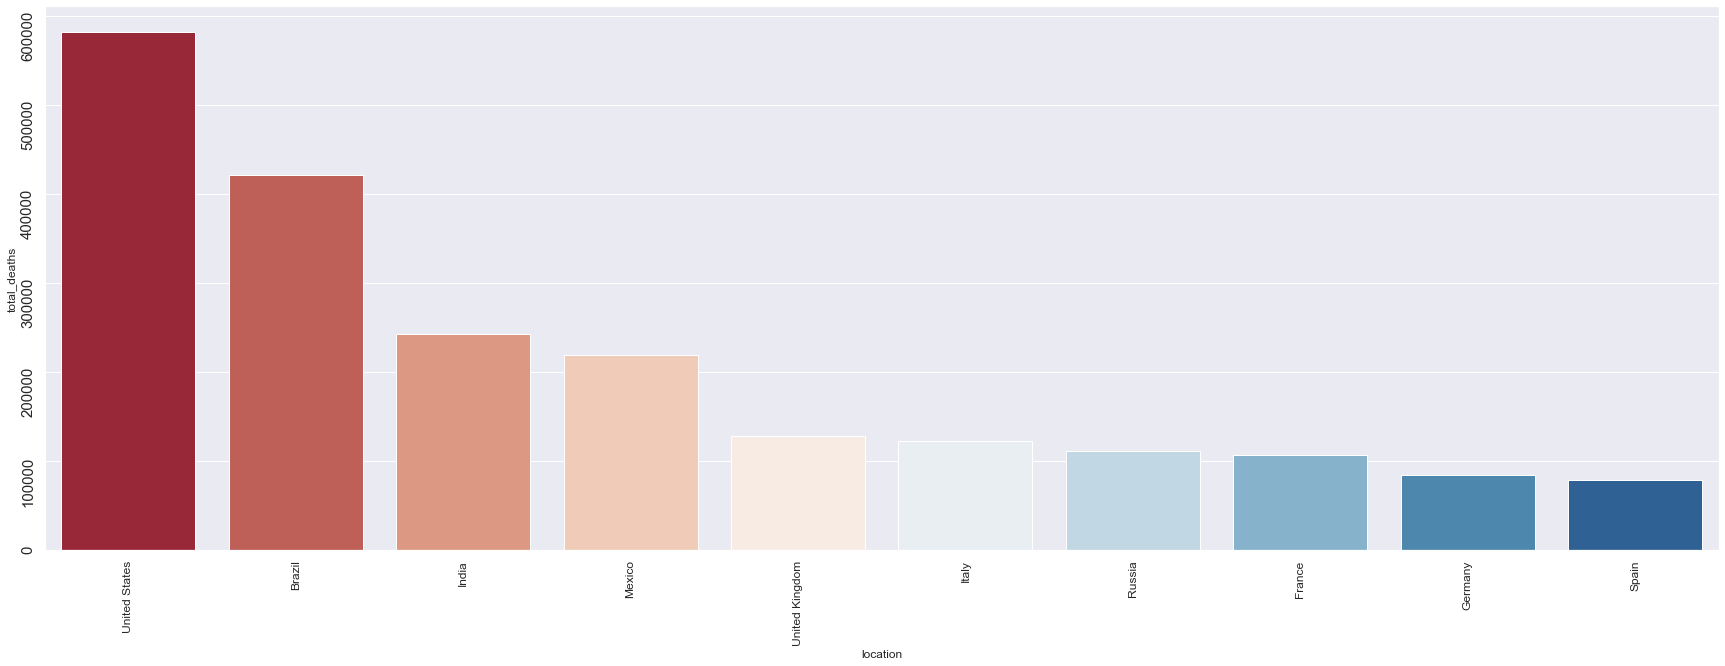

In [237]:
#country = dat2[dat2['location'].isin(dat5.index)].sort_values('total_deaths', ascending = False)
fig, ax = plt.subplots(figsize=(30,10))
sns.barplot(dat5.index, 'total_deaths', data = dat5, ax =ax, palette='RdBu')

plt.xticks(rotation=90, fontsize = 12)
plt.yticks(rotation=90, fontsize = 15)

plt.show()

In [276]:
dat6 = dat2[dat2['location'].isin(['United States', 'India', 'Brazil', 'United Kingdom', 'Italy', 'France', 'Russia', 'Mexico'])]
dat6

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-02-26,BRA,South America,Brazil,1.0,1.0,NaN,NaN,NaN,NaN,0.005,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
2020-02-27,BRA,South America,Brazil,1.0,0.0,NaN,NaN,NaN,NaN,0.005,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
2020-02-28,BRA,South America,Brazil,1.0,0.0,NaN,NaN,NaN,NaN,0.005,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
2020-02-29,BRA,South America,Brazil,2.0,1.0,NaN,NaN,NaN,NaN,0.009,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
2020-03-01,BRA,South America,Brazil,2.0,0.0,NaN,NaN,NaN,NaN,0.009,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-05,USA,North America,United States,32557444.0,44510.0,46656.286,579275.0,776.0,685.857,98360.071,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
2021-05-06,USA,North America,United States,32604810.0,47366.0,45108.714,580064.0,789.0,676.571,98503.170,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
2021-05-07,USA,North America,United States,32651865.0,47055.0,43556.286,580901.0,837.0,692.143,98645.329,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926


In [277]:
dat5.isna().sum()

total_deaths    0
dtype: int64

In [299]:
countries = ['United States', 'India', 'Brazil', 'United Kingdom', 'Italy', 'France', 'Russia', 'Mexico']
dat_before = dat6[(dat6.index < '2020-12-01') & (dat6['location'].isin(countries))]
dat_after  = dat6[(dat6.index > '2020-11-30') & (dat6['location'].isin(countries))]
india = dat6[dat6['location'] == 'India']

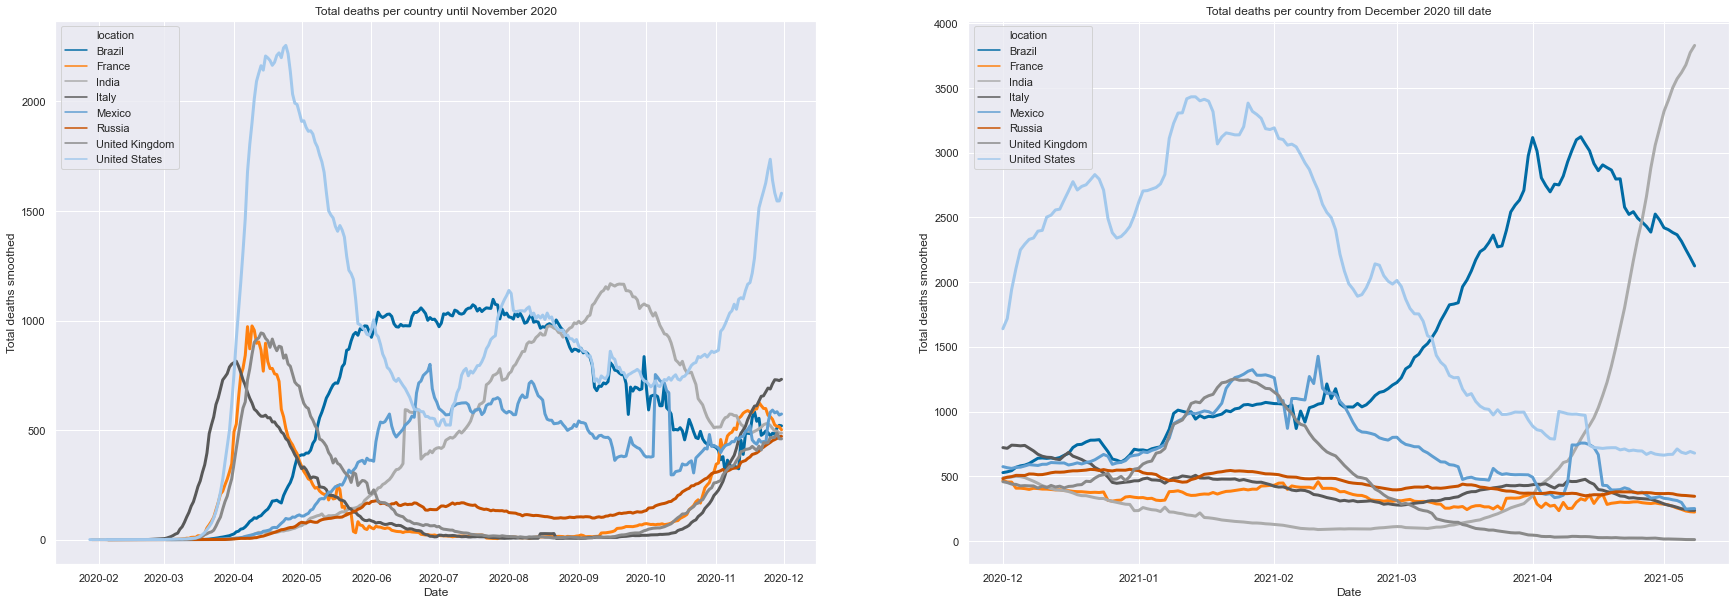

In [319]:
plt.style.use("tableau-colorblind10")
sns.color_palette("tab10")

fig, ax = plt.subplots(1,2, figsize=(30,10), squeeze = False)

sns.lineplot(dat_before.index , 'new_deaths_smoothed', data = dat_before, hue= 'location', ax =ax[0][0], linewidth = 3)
ax[0,0].set_xlabel('Date')
ax[0,0].set_ylabel('Total deaths smoothed')
ax[0,0].set_title('Total deaths per country until November 2020')
plt.savefig('Total deaths per country until November 2020')

sns.lineplot(dat_after.index , 'new_deaths_smoothed', data = dat_after, hue= 'location', ax =ax[0][1], linewidth = 3)
ax[0,1].set_xlabel('Date')
ax[0,1].set_ylabel('Total deaths smoothed')
ax[0,1].set_title('Total deaths per country from December 2020 till date')
plt.savefig('Total deaths per country from December 2020 till date')

plt.show()
plt.close()

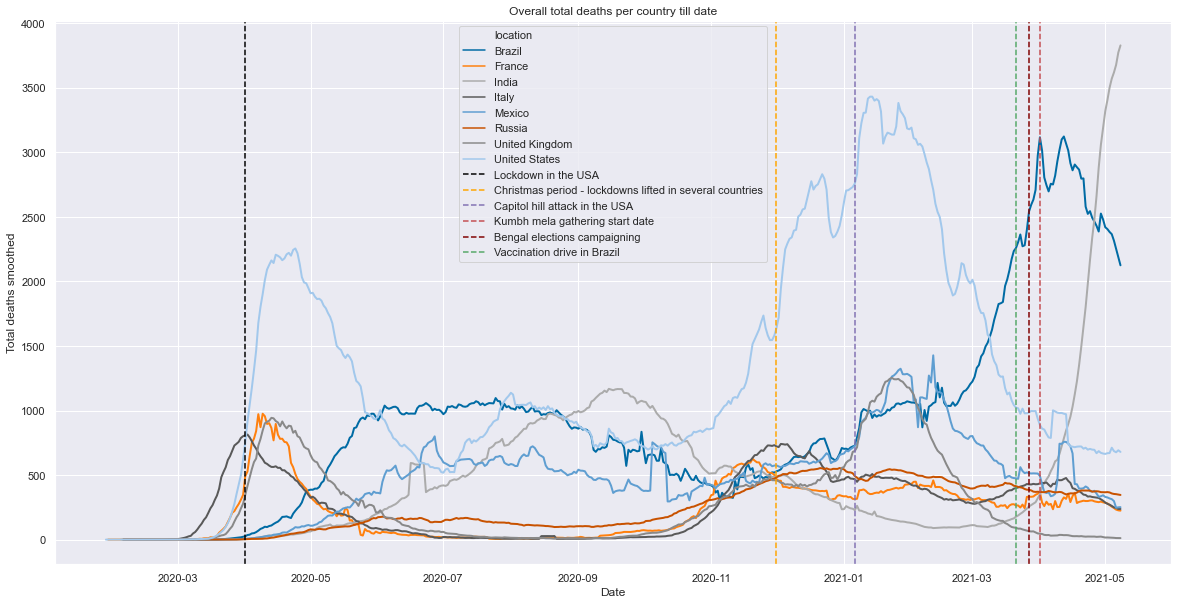

In [455]:
plt.style.use("tableau-colorblind10")
sns.color_palette("tab10")

fig, ax = plt.subplots(figsize=(20,10))

sns.lineplot(dat6.index , 'new_deaths_smoothed', data = dat6, hue= 'location', ax =ax, linewidth = 2)
plt.xlabel('Date')
plt.ylabel('Total deaths smoothed')
plt.title('Overall total deaths per country till date')

plt.axvline(x=datetime.datetime(2020,4,1), label='Lockdown in the USA', linestyle='--', color = 'black')
plt.axvline(x=datetime.datetime(2020,12,1), label='Christmas period - lockdowns lifted in several countries', linestyle='--', color = 'orange')
plt.axvline(x=datetime.datetime(2021,1,6), label='Capitol hill attack in the USA', linestyle='--', color = 'm')
plt.axvline(x=datetime.datetime(2021,4,1), label='Kumbh mela gathering start date', linestyle='--', color = 'r')
plt.axvline(x=datetime.datetime(2021,3,27), label='Bengal elections campaigning', linestyle='--', color = 'maroon')
plt.axvline(x=datetime.datetime(2021,3,21), label='Vaccination drive in Brazil', linestyle='--', color = 'g')

plt.legend()
plt.savefig('Overall total deaths per country till date')

plt.show()
plt.close()

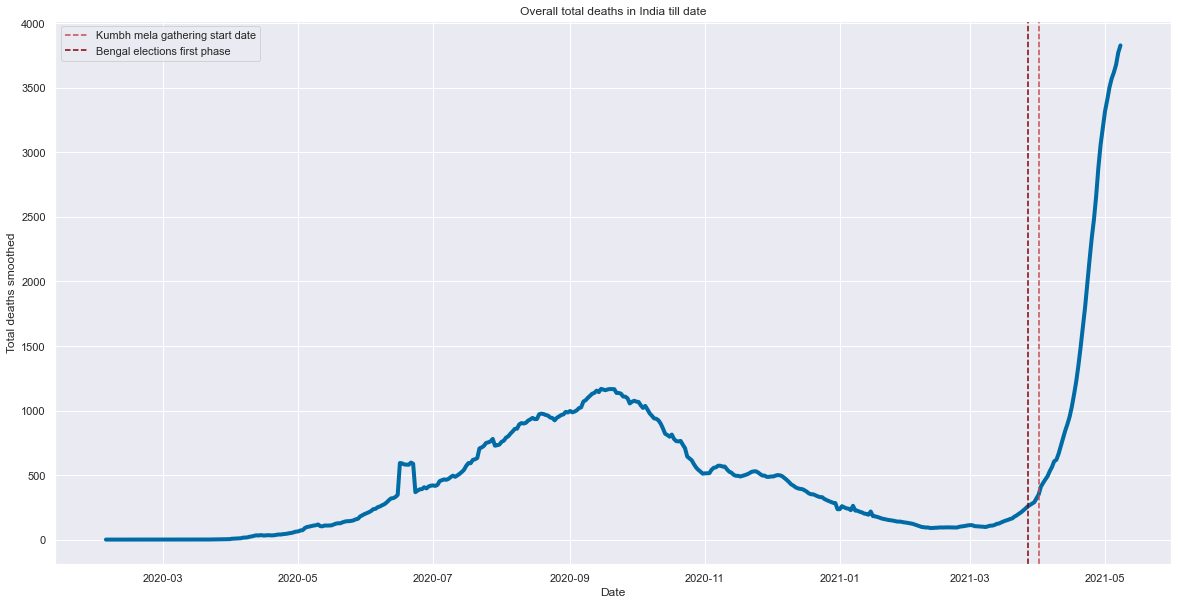

In [387]:
plt.style.use("tableau-colorblind10")
sns.color_palette("tab10")

fig, ax = plt.subplots(figsize=(20,10))

sns.lineplot(india.index , 'new_deaths_smoothed', data = india, ax =ax, linewidth = 4)
plt.xlabel('Date')
plt.ylabel('Total deaths smoothed')
plt.title('Overall total deaths in India till date')
plt.axvline(x=datetime.datetime(2021,4,1), label='Kumbh mela gathering start date', linestyle='--', color = 'r')
plt.axvline(x=datetime.datetime(2021,3,27), label='Bengal elections first phase', linestyle='--', color = 'maroon')
plt.legend()
plt.savefig('Overall deaths(smoothed) in India till date.png')

plt.show()
plt.close()

In [348]:
lockdown = pd.read_excel("C:/Users/johns/Downloads/Lockdown.xlsx", index_col=None)
lockdown.sort_values('total_length', ascending = False, inplace=True)

C:\Users\johns\anaconda3-python\envs\bul7cv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  """Entry point for launching an IPython kernel.


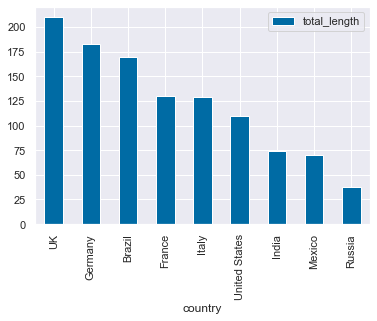

In [349]:
lockdown.plot(x='country', y='total_length', kind='bar')

In [446]:
df2 = dat_after[['location', 'new_deaths_smoothed']]
df3 = df2.groupby('location').resample('m').sum()
df3.reset_index(inplace=True)
df3

,location,date,new_deaths_smoothed
0,Brazil,2020-12-31,20380.715
1,Brazil,2021-01-31,29124.001
2,Brazil,2021-02-28,29965.714
3,Brazil,2021-03-31,61033.143
4,Brazil,2021-04-30,83434.572
5,Brazil,2021-05-31,18461.142
6,France,2020-12-31,11900.141
7,France,2021-01-31,11512.429
8,France,2021-02-28,10724.999
9,France,2021-03-31,9039.144


[[Text(0, 0, 'December, 2020'),
  Text(0, 0, 'January, 2021'),
  Text(0, 0, 'February,2021'),
  Text(0, 0, 'March, 2021'),
  Text(0, 0, 'April, 2021'),
  Text(0, 0, 'May, 2021')]]

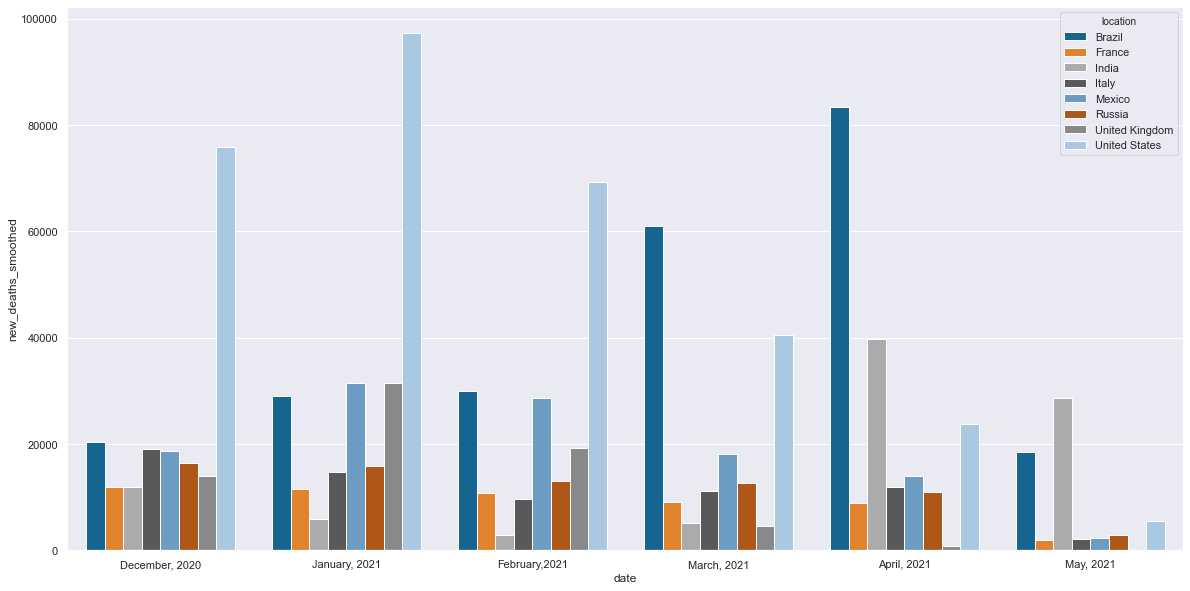

In [449]:
plt.style.use("tableau-colorblind10")

fig, ax = plt.subplots(figsize=(20,10))
g= sns.barplot(x='date', y = 'new_deaths_smoothed', data = df3, hue='location', ax = ax)
g.set(xticklabels=['December, 2020', 'January, 2021', 'February,2021', 'March, 2021', 'April, 2021', 'May, 2021'] )